In [1]:
import pandas as pd
import io
import datetime
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import warnings
import numpy as np
import seaborn as sns
import uszipcode
from uszipcode import SearchEngine
import folium
from folium.plugins import HeatMap
from scipy.stats import pearsonr

/Users/max/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
url = 'https://raw.githubusercontent.com/maxsohl/GSB521FinalProj/main/ufo_sightings_scrubbed.csv'
warnings.filterwarnings('ignore')
df = pd.read_csv(url)

In [3]:
us_df = df.loc[df["country"] == "us"]

In [4]:
us_df['datetime'] = pd.to_datetime(us_df['datetime']) #convert to datetime data type
us_df['date'] = us_df['datetime'].dt.date #seperate into two columns
us_df['time'] = us_df['datetime'].dt.time
pd.to_datetime(us_df['date'])
us_df['year'] = us_df['date'].apply(lambda x: x.strftime('%Y'))
us_df['year'] = us_df['year'].astype(int)
year_to_filter = 2000
us_df_2000 = us_df[us_df['year'] > year_to_filter]
us_df_2000

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
102,2001-10-10 03:00:00,rockwell city,ia,us,triangle,240,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,2002-07-01,42.3952778,-94.633611,2001-10-10,03:00:00,2001
105,2001-10-10 20:35:00,hayward,ca,us,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF ...,2001-11-20,37.6688889,-122.079722,2001-10-10,20:35:00,2001
106,2001-10-10 21:15:00,ottumwa,ia,us,rectangle,300,3-5 minutes,We saw a square object at night&#44 which had...,2001-11-20,41.0041667,-92.373611,2001-10-10,21:15:00,2001
107,2001-10-10 21:30:00,fresno,ca,us,changing,900,15 min. apprx,Objects were sighted driving north on Highway ...,2001-11-20,36.7477778,-119.771389,2001-10-10,21:30:00,2001
108,2001-10-10 22:00:00,phoenix,az,us,triangle,60,less then a minute,Triangle shaped craft spotted flying west to e...,2001-11-20,33.4483333,-112.073333,2001-10-10,22:00:00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444,2013-09-09,21:15:00,2013
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500,2013-09-09,22:00:00,2013
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444,2013-09-09,22:00:00,2013
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556,2013-09-09,22:20:00,2013


### Import county dataset and merge with alien data

source: https://public.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000/table/?disjunctive.cou_name_en&sort=name

In [5]:
url = 'https://raw.githubusercontent.com/maxsohl/GSB521FinalProj/main/city_county.csv'
city_county = pd.read_csv(url)
city_county

,state,city,county
0,ak,adak,aleutians west
1,ak,akiachak,bethel
2,ak,akiak,bethel
3,ak,akutan,aleutians east
4,ak,alakanuk,kusilvak
...,...,...,...
29875,wy,worland,washakie
29876,wy,wright,campbell
29877,wy,wyarno,sheridan
29878,wy,yellowstone national park,park


In [6]:
merged_df = pd.merge(us_df_2000, city_county, on= ['city','state'], how = 'left')
merged_df.dropna(subset=['county'], inplace=True)
merged_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,county
0,2001-10-10 03:00:00,rockwell city,ia,us,triangle,240,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,2002-07-01,42.3952778,-94.633611,2001-10-10,03:00:00,2001,calhoun
1,2001-10-10 20:35:00,hayward,ca,us,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF ...,2001-11-20,37.6688889,-122.079722,2001-10-10,20:35:00,2001,alameda
2,2001-10-10 21:15:00,ottumwa,ia,us,rectangle,300,3-5 minutes,We saw a square object at night&#44 which had...,2001-11-20,41.0041667,-92.373611,2001-10-10,21:15:00,2001,wapello
3,2001-10-10 21:30:00,fresno,ca,us,changing,900,15 min. apprx,Objects were sighted driving north on Highway ...,2001-11-20,36.7477778,-119.771389,2001-10-10,21:30:00,2001,fresno
4,2001-10-10 22:00:00,phoenix,az,us,triangle,60,less then a minute,Triangle shaped craft spotted flying west to e...,2001-11-20,33.4483333,-112.073333,2001-10-10,22:00:00,2001,maricopa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55912,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444,2013-09-09,21:15:00,2013,davidson
55914,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500,2013-09-09,22:00:00,2013,ada
55915,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444,2013-09-09,22:00:00,2013,napa
55916,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556,2013-09-09,22:20:00,2013,fairfax


### Import EducationByCounty and merge with df

In [7]:
url = 'https://raw.githubusercontent.com/maxsohl/GSB521FinalProj/main/EducationByCounty.csv'
education = pd.read_csv(url)

In [8]:
education['state'] = education['State'].str.lower()
education['county'] = education['Area name'].str.lower()

In [9]:
#to match merged_df with education add county after every county name in merged_df
def add_county(word):
    return f"{word} county"

merged_df['county'] = merged_df['county'].apply(add_county)

In [10]:
education_merged_df = pd.merge(merged_df, education, on= ['county','state'], how = 'left')

In [11]:
education_merged_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
0,2001-10-10 03:00:00,rockwell city,ia,us,triangle,240,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,2002-07-01,42.3952778,...,34.5,19.1,423,"2,695","2,458","1,477",6.0,38.2,34.9,20.9
1,2001-10-10 20:35:00,hayward,ca,us,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF ...,2001-11-20,37.6688889,...,25.6,41.1,"131,272","198,825","271,096","592,670",11.0,16.7,22.7,49.6
2,2001-10-10 21:15:00,ottumwa,ia,us,rectangle,300,3-5 minutes,We saw a square object at night&#44 which had...,2001-11-20,41.0041667,...,31.0,15.4,"2,885","8,786","7,765","4,586",12.0,36.6,32.3,19.1
3,2001-10-10 21:30:00,fresno,ca,us,changing,900,15 min. apprx,Objects were sighted driving north on Highway ...,2001-11-20,36.7477778,...,30.7,19.4,"136,835","140,532","201,826","140,183",22.1,22.7,32.6,22.6
4,2001-10-10 22:00:00,phoenix,az,us,triangle,60,less then a minute,Triangle shaped craft spotted flying west to e...,2001-11-20,33.4483333,...,33.5,29.5,"326,737","644,940","950,635","1,006,096",11.2,22.0,32.5,34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50853,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,...,26.3,35.0,"48,693","104,797","120,227","218,762",9.9,21.3,24.4,44.4
50854,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,...,36.2,35.3,"16,433","68,936","110,566","134,694",5.0,20.8,33.4,40.7
50855,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,...,32.0,31.2,"14,541","17,698","29,842","36,464",14.8,18.0,30.3,37.0
50856,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,...,20.1,58.2,"51,874","96,148","137,108","496,667",6.6,12.3,17.5,63.5


In [12]:
print(education_merged_df.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'date', 'time', 'year', 'county',
       'Federal Information Processing Standard (FIPS) Code', 'State',
       'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 

## Bring in fips number/ merge with educ data

In [13]:
url = 'https://raw.githubusercontent.com/maxsohl/GSB521FinalProj/main/fips2county.csv'
fips_to_county = pd.read_csv(url)
fips_to_county['county'] = fips_to_county['CountyName']
fips_to_county['state'] = fips_to_county['StateAbbr']
fips_to_county['fips'] = fips_to_county['CountyFIPS']
fips_to_county = fips_to_county.loc[:, ['county', 'state','fips']]
fips_to_county

,county,state,fips
0,Autauga,AL,1001
1,Baldwin,AL,1003
2,Barbour,AL,1005
3,Bibb,AL,1007
4,Blount,AL,1009
...,...,...,...
3138,Sweetwater,WY,56037
3139,Teton,WY,56039
3140,Uinta,WY,56041
3141,Washakie,WY,56043


### Merge fips_to_county with education_merged_df so can merge pop on fips

In [14]:
#Clean fips_to_county so it can be merged with education_merged_df
fips_to_county['county'] = fips_to_county['county'].str.lower()
fips_to_county['state'] = fips_to_county['state'].str.lower()
fips_to_county

,county,state,fips
0,autauga,al,1001
1,baldwin,al,1003
2,barbour,al,1005
3,bibb,al,1007
4,blount,al,1009
...,...,...,...
3138,sweetwater,wy,56037
3139,teton,wy,56039
3140,uinta,wy,56041
3141,washakie,wy,56043


In [15]:
def add_county(word):
    return f"{word} county"

fips_to_county['county'] = fips_to_county['county'].apply(add_county)


fips_to_county

,county,state,fips
0,autauga county,al,1001
1,baldwin county,al,1003
2,barbour county,al,1005
3,bibb county,al,1007
4,blount county,al,1009
...,...,...,...
3138,sweetwater county,wy,56037
3139,teton county,wy,56039
3140,uinta county,wy,56041
3141,washakie county,wy,56043


In [16]:
#Merge fips and educ
education_merged_df_fips = pd.merge(education_merged_df, fips_to_county, on=['county','state'], how='left')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)

In [17]:
#convert education_merged_df_fips['fips'] from float to int
education_merged_df_fips = education_merged_df_fips.dropna(subset=['fips'])
education_merged_df_fips['fips'] = education_merged_df_fips['fips'].astype(int)
education_merged_df_fips

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,county,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21",fips
0,2001-10-10 03:00:00,rockwell city,ia,us,triangle,240,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,2002-07-01,42.3952778,-94.633611,2001-10-10,03:00:00,2001,calhoun county,19025.0,IA,Calhoun County,9.0,10.0,9.0,10.0,"3,740","3,319",951,627,43.3,38.4,11.0,7.3,"2,750","3,719","1,290",827,32.0,43.3,15.0,9.6,"1,694","3,459","1,952",932,21.1,43.0,24.3,11.6,"1,149","3,002","2,514","1,212",14.6,38.1,31.9,15.4,630,"2,756","2,509","1,388",8.7,37.8,34.5,19.1,423,"2,695","2,458","1,477",6.0,38.2,34.9,20.9,19025
1,2001-10-10 20:35:00,hayward,ca,us,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF ...,2001-11-20,37.6688889,-122.079722,2001-10-10,20:35:00,2001,alameda county,6001.0,CA,Alameda County,1.0,1.0,1.0,1.0,"217,589","197,371","87,675","86,038",37.0,33.5,14.9,14.6,"162,536","215,093","148,837","151,045",24.0,31.7,22.0,22.3,"155,606","190,822","250,389","241,487",18.6,22.8,29.9,28.8,"168,281","181,668","270,813","332,954",17.6,19.0,28.4,34.9,"141,402","199,632","262,546","421,610",13.8,19.5,25.6,41.1,"131,272","198,825","271,096","592,670",11.0,16.7,22.7,49.6,6001
2,2001-10-10 21:15:00,ottumwa,ia,us,rectangle,300,3-5 minutes,We saw a square object at night&#44 which had

# Normalize number of sightings by county population with non census data

Source:https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/

In [18]:
url = 'https://raw.githubusercontent.com/maxsohl/GSB521FinalProj/main/PopulationEstimates.csv'
pop_df = pd.read_csv(url)
pop_df

,fips,state,county,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021
0,0,US,United States,NaN,"248,790,925","281,424,600","308,745,538","331,449,281","331,893,745"
1,1000,AL,Alabama,NaN,"4,040,389","4,447,207","4,779,736","5,024,279","5,039,877"
2,1001,AL,Autauga County,2.0,"34,222","43,751","54,571","58,805","59,095"
3,1003,AL,Baldwin County,3.0,"98,280","140,416","182,265","231,767","239,294"
4,1005,AL,Barbour County,6.0,"25,417","29,042","27,457","25,223","24,964"
...,...,...,...,...,...,...,...,...,...
3275,72145,PR,Vega Baja Municipio,1.0,"55,997","61,916","59,662","54,414","53,897"
3276,72147,PR,Vieques Municipio,7.0,"8,602","9,106","9,301","8,249","8,224"
3277,72149,PR,Villalba Municipio,2.0,"23,559","27,910","26,073","22,093","21,813"
3278,72151,PR,Yabucoa Municipio,1.0,"36,483","39,121","37,941","30,426","30,186"


In [19]:
print(pop_df.dtypes)

fips                                 int64
state                               object
county                              object
Rural-Urban Continuum Code 2013    float64
Population 1990                     object
Population 2000                     object
Population 2010                     object
Population 2020                     object
Population 2021                     object
dtype: object


In [20]:
print(education_merged_df_fips.dtypes)

datetime                                                                    datetime64[ns]
city                                                                                object
state                                                                               object
country                                                                             object
shape                                                                               object
                                                                                 ...      
Percent of adults with less than a high school diploma, 2017-21                    float64
Percent of adults with a high school diploma only, 2017-21                         float64
Percent of adults completing some college or associate's degree, 2017-21           float64
Percent of adults with a bachelor's degree or higher, 2017-21                      float64
fips                                                                                 int64

In [21]:
pop_educ_alien_df = pd.merge(education_merged_df_fips, pop_df, on='fips', how='left')
pop_educ_alien_df

,datetime,city,state_x,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,county_x,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21",fips,state_y,county_y,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021
0,2001-10-10 03:00:00,rockwell city,ia,us,triangle,240,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,2002-07-01,42.3952778,-94.633611,2001-10-10,03:00:00,2001,calhoun county,19025.0,IA,Calhoun County,9.0,10.0,9.0,10.0,"3,740","3,319",951,627,43.3,38.4,11.0,7.3,"2,750","3,719","1,290",827,32.0,43.3,15.0,9.6,"1,694","3,459","1,952",932,21.1,43.0,24.3,11.6,"1,149","3,002","2,514","1,212",14.6,38.1,31.9,15.4,630,"2,756","2,509","1,388",8.7,37.8,34.5,19.1,423,"2,695","2,458","1,477",6.0,38.2,34.9,20.9,19025,IA,Calhoun County,9.0,"11,508","11,114","9,670","9,927","9,915"
1,2001-10-10 20:35:00,hayward,ca,us,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF ...,2001-11-20,37.6688889,-122.079722,2001-10-10,20:35:00,2001,alameda county,6001.0,CA,Alameda County,1.0,1.0,1.0,1.0,"217,589","197,371","87,675","86,038",37.0,33.5,14.9,14.6,"162,536","215,093","148,837","151,045",24.0,31.7,22.0,22.3,"155,606","190,822","250,389","241,487",18.6,22.8,29.9,28.8,"168,281","181,668","270,813","332,954",17.6,19.0,28.4,34.9,"141,402","199,632","262,546","421,

In [67]:
county_count_df = pop_educ_alien_df.groupby(['fips']).size().reset_index(name='count')
county_count_df
county_count_merged_df = pd.merge(county_count_df, pop_educ_alien_df, on=['fips'], how='left')
county_count_merged_df
county_count_merged_df = county_count_merged_df.drop_duplicates(subset=['fips'])
county_count_merged_df['Population 2010'] = county_count_merged_df['Population 2010'].str.replace(',', '')
county_count_merged_df['Population 2010'] = county_count_merged_df['Population 2010'].astype(int)
county_count_merged_df['norm_count'] = (county_count_merged_df['count']/county_count_merged_df['Population 2010'])*100000
county_count_merged_df

,fips,count,datetime,city,state_x,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,county_x,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21",state_y,county_y,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021,norm_count
0,1001,4,2008-11-18 07:40:00,prattville,al,us,disk,10,8-10 seconds,I saw a bright reflection fairly low in the sk...,2009-01-10,32.4638889,-86.459722,2008-11-18,07:40:00,2008,autauga county,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"5,232","11,874","10,409","7,629",14.9,33.8,29.6,21.7,"4,126","12,977","11,367","11,144",10.4,32.8,28.7,28.1,AL,Autauga County,2.0,"34,222","43,751",54571,"58,805","59,095",7.329900
4,1003,40,2007-10-11 20:30:00,gulf shores,al,us,disk,1800,30 min.,Brightly lighted Object appeared total of 6-8 ...,2007-11-28,30.2458333,-87.700833,2007-10-11,20:30:00,2007,baldwin county,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,16.8,"17,258","28,428","28,178","22,146",18.0,29.6,29.3,23.

In [70]:
max_value = county_count_merged_df['norm_count'].max()
max_value

242.71844660194174

In [72]:
avg_value = county_count_merged_df['norm_count'].mean()
avg_value

21.124485903273847

# Geo heatmap of number of sightings in each county

In [77]:
#Still need to change the colors, scope, etc
map = folium.Map(location=[37,-96], zoom_start=4)
heatmap = HeatMap(county_count_merged_df[['latitude', 'longitude ', 'norm_count']].values.tolist(), radius=12, max_val=240)
heatmap.add_to(map)
map

Prof reccomended https://nbviewer.org/ to show interactive notebooks

# Violin plot of educ relative to norm_count

### How to interpret:
https://mode.com/blog/violin-plot-examples/

<AxesSubplot: xlabel='norm_count'>

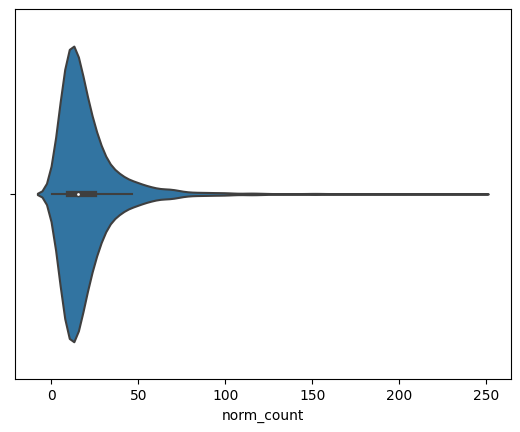

In [80]:
sns.violinplot(x=county_count_merged_df["norm_count"])

<AxesSubplot: xlabel='Percent of adults with less than a high school diploma, 2008-12'>

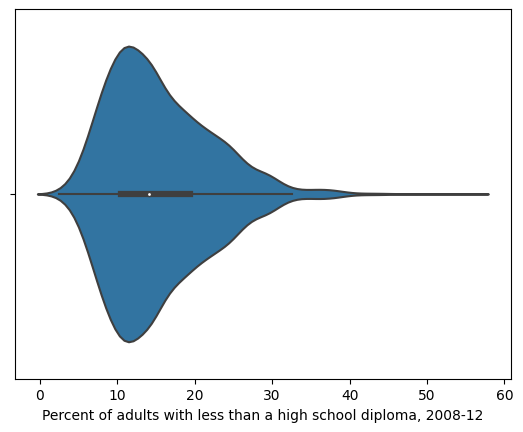

In [82]:
sns.violinplot(x=county_count_merged_df['Percent of adults with less than a high school diploma, 2008-12'])

<AxesSubplot: xlabel='Percent of adults with a high school diploma only, 2008-12'>

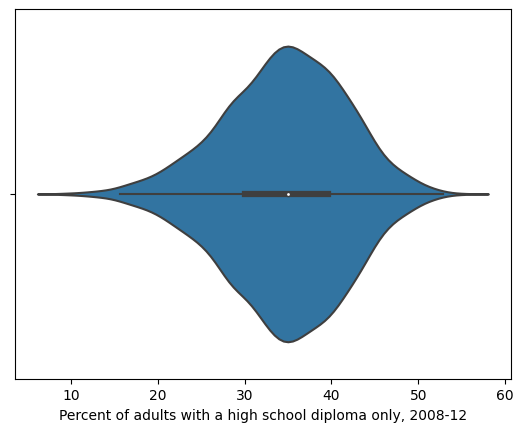

In [83]:
sns.violinplot(x=county_count_merged_df['Percent of adults with a high school diploma only, 2008-12'])

<AxesSubplot: xlabel="Percent of adults completing some college or associate's degree, 2008-12">

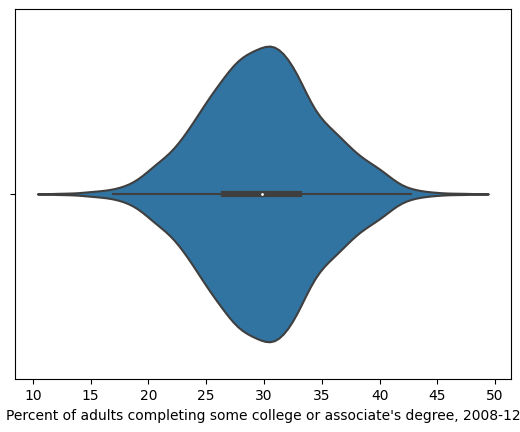

In [85]:
sns.violinplot(x=county_count_merged_df["Percent of adults completing some college or associate's degree, 2008-12"])

<AxesSubplot: xlabel="Percent of adults with a bachelor's degree or higher, 2008-12">

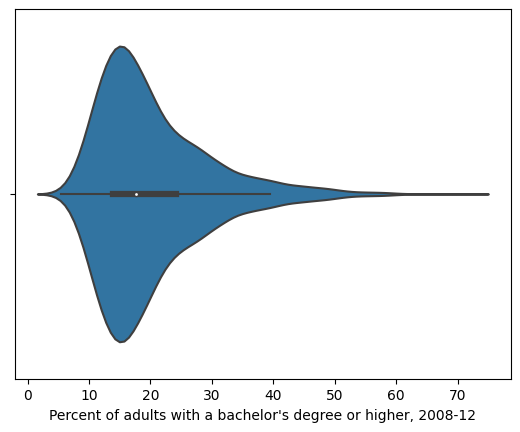

In [86]:
sns.violinplot(x=county_count_merged_df["Percent of adults with a bachelor's degree or higher, 2008-12"])

## Box plot with jitter

In [93]:
avg_norm_count = county_count_merged_df['norm_count'].mean()
county_count_merged_df['norm_count_mean'] = county_count_merged_df['norm_count'].apply(lambda x: 'above' if x > avg_norm_count else 'below')
county_count_merged_df

,fips,count,datetime,city,state_x,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,county_x,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21",state_y,county_y,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021,norm_count,Above_Mean,norm_count_above_mean,norm_count_mean
0,1001,4,2008-11-18 07:40:00,prattville,al,us,disk,10,8-10 seconds,I saw a bright reflection fairly low in the sk...,2009-01-10,32.4638889,-86.459722,2008-11-18,07:40:00,2008,autauga county,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"5,232","11,874","10,409","7,629",14.9,33.8,29.6,21.7,"4,126","12,977","11,367","11,144",10.4,32.8,28.7,28.1,AL,Autauga County,2.0,"34,222","43,751",54571,"58,805","59,095",7.329900,0,0,below
4,1003,40,2007-10-11 20:30:00,gulf shores,al,us,disk,1800,30 min.,Brightly lighted Object appeared total of 6-8 ...,2007-11-28,30.2458333,-87.700833,2007-10-11,20:30:00,2007,baldwin county,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,

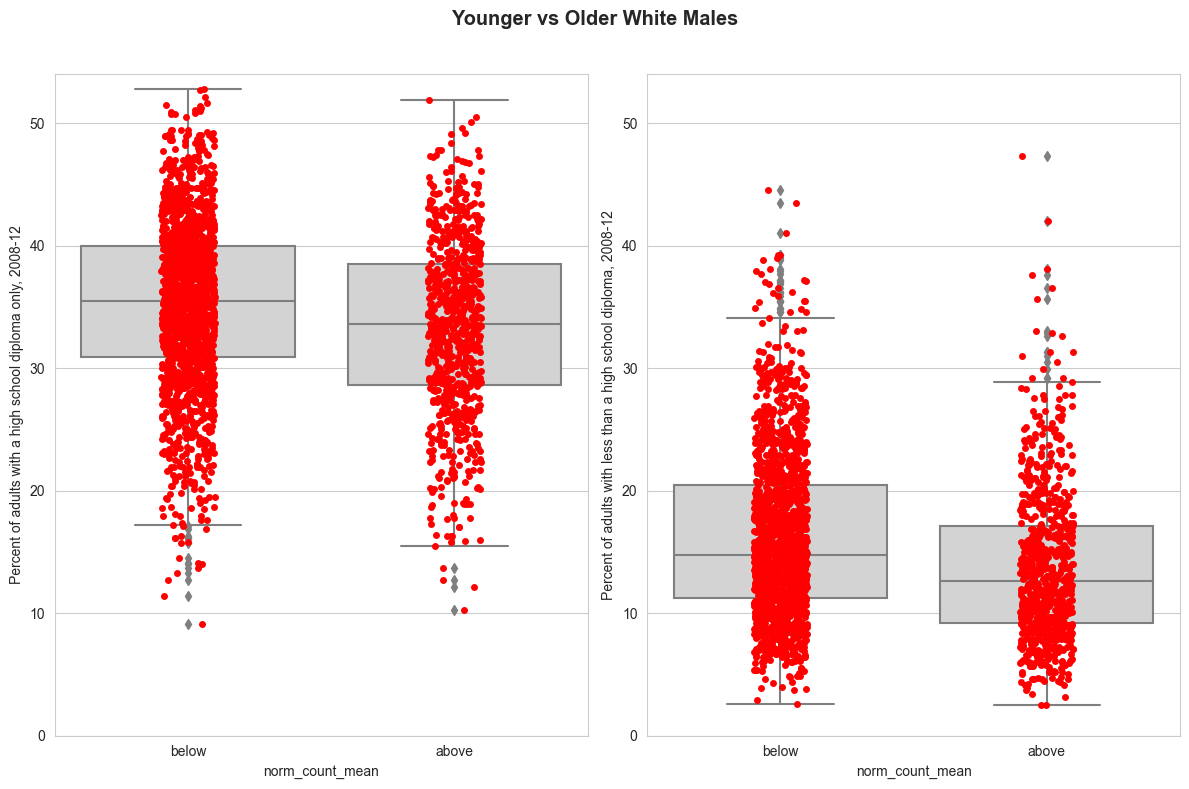

In [140]:
# figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# boxplot 
sns.boxplot(x="norm_count_mean", y="Percent of adults with less than a high school diploma, 2008-12", data=county_count_merged_df, color="lightgray", ax=axes[1]).set_ylim(6,25)
sns.boxplot(x="norm_count_mean", y="Percent of adults with a high school diploma only, 2008-12", data=county_count_merged_df, color="lightgray", ax=axes[0]).set_ylim(6,25)


# setting color for jitter and grid 
colors = ["red", "dodgerblue"]
sns.set_palette(colors)
sns.set_style("whitegrid")

# jitter plot / stripplot
sns.stripplot(x="norm_count_mean", y="Percent of adults with less than a high school diploma, 2008-12", data=county_count_merged_df, ax=axes[1]).set_ylim(0,54)
sns.stripplot(x="norm_count_mean", y="Percent of adults with a high school diploma only, 2008-12", data=county_count_merged_df, ax=axes[0]).set_ylim(0,54)


# showing the graph
fig.tight_layout()
fig.suptitle("Younger vs Older White Males", fontsize = 'x-large', fontweight = 'bold' )
fig.subplots_adjust(top = 0.9)
plt.show()

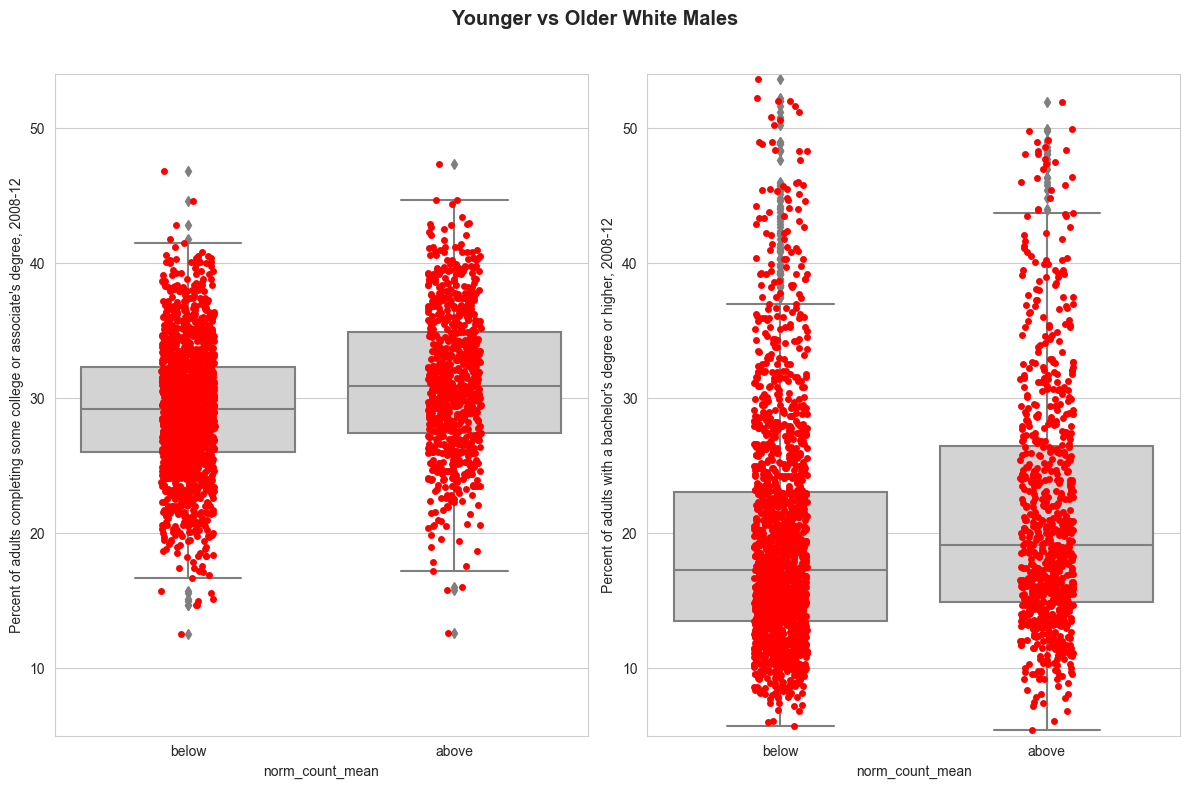

In [128]:
# figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# boxplot 
sns.boxplot(x="norm_count_mean", y="Percent of adults completing some college or associate's degree, 2008-12", data=county_count_merged_df, color="lightgray", ax=axes[0]).set_ylim(6,25)
sns.boxplot(x="norm_count_mean", y="Percent of adults with a bachelor's degree or higher, 2008-12", data=county_count_merged_df, color="lightgray", ax=axes[1]).set_ylim(6,25)


# setting color for jitter and grid 
colors = ["red", "dodgerblue"]
sns.set_palette(colors)
sns.set_style("whitegrid")

# jitter plot / stripplot
sns.stripplot(x="norm_count_mean", y="Percent of adults completing some college or associate's degree, 2008-12", data=county_count_merged_df, ax=axes[0]).set_ylim(5,54)
sns.stripplot(x="norm_count_mean", y="Percent of adults with a bachelor's degree or higher, 2008-12", data=county_count_merged_df, ax=axes[1]).set_ylim(5,54)


# showing the graph
fig.tight_layout()
fig.suptitle("Younger vs Older White Males", fontsize = 'x-large', fontweight = 'bold' )
fig.subplots_adjust(top = 0.9)
plt.show()

## Person's correlation

In [130]:
from scipy.stats import pearsonr

county_count_merged_df = county_count_merged_df.dropna(subset=['norm_count'])
county_count_merged_df = county_count_merged_df.dropna(subset=['Percent of adults with less than a high school diploma, 2008-12'])


# Convert dataframe into series
list1 = county_count_merged_df['norm_count']
list2 = county_count_merged_df['Percent of adults with less than a high school diploma, 2008-12']

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
corr1 = corr

Pearsons correlation: -0.164


In [131]:
# Convert dataframe into series
list1 = county_count_merged_df['norm_count']
list2 = county_count_merged_df['Percent of adults with a high school diploma only, 2008-12']

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
corr2 = corr

Pearsons correlation: -0.119


In [132]:
# Convert dataframe into series
list1 = county_count_merged_df['norm_count']
list2 = county_count_merged_df["Percent of adults completing some college or associate's degree, 2008-12"]

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
corr3 = corr

Pearsons correlation: 0.214


In [133]:
# Convert dataframe into series
list1 = county_count_merged_df['norm_count']
list2 = county_count_merged_df["Percent of adults with a bachelor's degree or higher, 2008-12"]

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
corr4 = corr

Pearsons correlation: 0.096


In [139]:
import pandas as pd

data = {"Pearson's Correlation": [corr1, corr2, corr3, corr4]}

df = pd.DataFrame(data, index=["Percent of adults with less than a high school diploma, 2008-12",
                               "Percent of adults with a high school diploma only, 2008-12",
                               "Percent of adults completing some college or associate's degree, 2008-12",
                               "Percent of adults with a bachelor's degree or higher, 2008-12"])

df

,Pearson's Correlation
"Percent of adults with less than a high school diploma, 2008-12",-0.163795
"Percent of adults with a high school diploma only, 2008-12",-0.119032
"Percent of adults completing some college or associate's degree, 2008-12",0.214229
"Percent of adults with a bachelor's degree or higher, 2008-12",0.096005
